In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as sts
import numpy as np
import scipy.stats as st
from scipy import stats
from functools import reduce
output_data_file = "output_data/StocksandCommodities.csv"

# Cleaning Data

In [2]:
#Need this for the graph
DATES_only = pd.read_csv('output_data/commoditydates.csv')

In [3]:
#Creating an auto stock dataframe from yahoo finance 
TSLA = yf.Ticker("TSLA")
TM = yf.Ticker("TM")
F = yf.Ticker("F")
GM = yf.Ticker("GM")
HMC = yf.Ticker("HMC")
DDAIF = yf.Ticker("DDAIF")
VWAGY = yf.Ticker("VWAGY")
FUJHY = yf.Ticker("FUJHY")
MZDAY = yf.Ticker("MZDAY")
DODGX = yf.Ticker("DODGX")

tsla_historical = TSLA.history(start="2013-12-01", end="2021-06-01", interval="1mo")
tm_historical = TM.history(start="2013-12-01", end="2021-06-01", interval="1mo")
f_historical = F.history(start="2013-12-01", end="2021-06-01", interval="1mo")
gm_historical = GM.history(start="2013-12-01", end="2021-06-01", interval="1mo")
hmc_historical = HMC.history(start="2013-12-01", end="2021-06-01", interval="1mo")
ddaif_historical = DDAIF.history(start="2013-12-01", end="2021-06-01", interval="1mo")
vwagy_historical = VWAGY.history(start="2013-12-01", end="2021-06-01", interval="1mo")
fujhy_historical = FUJHY.history(start="2013-12-01", end="2021-06-01", interval="1mo")
mzday_historical = MZDAY.history(start="2013-12-01", end="2021-06-01", interval="1mo")
dodgx_historical = DODGX.history(start="2013-12-01", end="2021-06-01", interval="1mo") 

f_historical["Ticker"]="F"
tm_historical["Ticker"]="TM" 
gm_historical["Ticker"]="GM"
hmc_historical["Ticker"]="HMC"
ddaif_historical["Ticker"]="DDAIF"
vwagy_historical["Ticker"]="VWAGY"
tsla_historical["Ticker"]="TSLA"
fujhy_historical["Ticker"]="FUJHY"
mzday_historical["Ticker"]="MZDAY"
dodgx_historical["Ticker"]="DODGX"
merged_df = pd.concat([f_historical, tm_historical, gm_historical, hmc_historical, ddaif_historical, vwagy_historical,tsla_historical, fujhy_historical, mzday_historical, dodgx_historical ])
merged_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2013-12-01,12.136027,12.192738,10.704089,10.938020,1.037390e+09,0.000,0.0,F
2014-01-01,10.930932,11.895009,10.562314,10.604847,1.003488e+09,0.000,0.0,F
2014-01-29,NaN,NaN,NaN,NaN,NaN,0.125,0.0,F
2014-02-01,10.718429,11.068564,10.289692,10.997108,7.126964e+08,0.000,0.0,F
2014-03-01,10.861347,11.311521,10.739871,11.147172,6.173546e+08,0.000,0.0,F
...,...,...,...,...,...,...,...,...
2021-03-01,213.725751,224.879944,213.021180,219.074600,0.000000e+00,0.000,0.0,DODGX
2021-03-26,NaN,NaN,NaN,NaN,NaN,1.050,0.0,DODGX
2021-04-01,222.659168,235.033003,222.659168,232.161392,0.000000e+00,0.000,0.0,DODGX


In [4]:
stocks_df=merged_df.dropna()
stocks_df.reset_index()
stocks_df.to_csv(output_data_file, encoding= "utf-8", index = True, header= True)
stocks_df.reset_index().groupby('Ticker')['Date'].agg(['min', 'max', 'count'])
stocks_df.reset_index().isnull().sum()
New_df = stocks_df.reset_index()[['Date', 'Ticker', 'Close']]
New_df.columns = ['Date', 'Ticker', 'Price']
New_df

,Date,Ticker,Price
0,2013-12-01,F,10.938020
1,2014-01-01,F,10.604847
2,2014-02-01,F,10.997108
3,2014-03-01,F,11.147172
4,2014-04-01,F,11.540178
...,...,...,...
905,2021-02-01,DODGX,208.823471
906,2021-03-01,DODGX,219.074600
907,2021-04-01,DODGX,232.161392
908,2021-05-01,DODGX,240.038376


In [5]:
New_df1 = New_df.pivot_table(index=['Date'], columns='Ticker', values=['Price'])
New_df1.columns = [col[1] for col in New_df1.columns.values]
New_df1

,DDAIF,DODGX,F,FUJHY,GM,HMC,MZDAY,TM,TSLA,VWAGY
Date,,,,,,,,,,
2013-12-01,63.087685,148.359329,10.938020,14.3800,31.588165,41.153336,13.0500,111.351120,30.086000,26.011223
2014-01-01,60.677994,143.872009,10.604847,13.7075,27.886005,37.509998,12.0325,104.811813,36.282001,23.029680
2014-02-01,67.065140,150.355576,10.997108,13.4275,27.978752,36.049999,12.0300,105.305000,48.962002,24.232758
2014-03-01,68.785316,151.350998,11.147172,13.6000,26.603003,35.340000,11.1250,103.113052,41.689999,24.147163
2014-04-01,67.326439,151.572998,11.540178,13.1000,26.885984,33.299999,11.3050,100.839981,41.577999,25.421572
...,...,...,...,...,...,...,...,...,...,...
2021-02-01,78.878670,208.823471,11.700000,9.4400,51.330002,27.670000,3.9700,147.929993,675.500000,23.005695
2021-03-01,87.905998,219.074600,12.250000,10.0000,57.459999,30.200001,4.0900,156.059998,667.929993,35.660892
2021-04-01,87.051399,232.161392,11.540000,9.2800,57.220001,29.820000,3.8500,150.770004,709.440002,31.151705


In [6]:
TSLA_only = New_df1.loc[:, New_df1.columns.intersection(['Date','TSLA'])]
TM_only = New_df1.loc[:, New_df1.columns.intersection(['Date','TM'])]
F_only = New_df1.loc[:, New_df1.columns.intersection(['Date','F'])]
GM_only= New_df1.loc[:, New_df1.columns.intersection(['Date','GM'])]
HMC_only= New_df1.loc[:, New_df1.columns.intersection(['Date','HMC'])]
DDAIF_only= New_df1.loc[:, New_df1.columns.intersection(['Date','DDAIF'])]
VWAGY_only= New_df1.loc[:, New_df1.columns.intersection(['Date','VWAGY'])]
FUJHY_only= New_df1.loc[:, New_df1.columns.intersection(['Date','FUJHY'])]
MZDAY_only= New_df1.loc[:, New_df1.columns.intersection(['Date','MZDAY'])]
DODGX_only= New_df1.loc[:, New_df1.columns.intersection(['Date','DODGX'])]
TSLA_only

,TSLA
Date,
2013-12-01,30.086000
2014-01-01,36.282001
2014-02-01,48.962002
2014-03-01,41.689999
2014-04-01,41.577999
...,...
2021-02-01,675.500000
2021-03-01,667.929993
2021-04-01,709.440002


In [7]:
#Creating a commodity dataframe from yahoo finance 
CL = yf.Ticker("CL")
NG = yf.Ticker("NG")
X = yf.Ticker("X")
GOLD = yf.Ticker("GOLD")

cl_historical = CL.history(start="2013-12-01", end="2021-06-01", interval="1mo")
ng_historical = NG.history(start="2013-12-01", end="2021-06-01", interval="1mo")
x_historical = X.history(start="2013-12-01", end="2021-06-01", interval="1mo")
GOLD_historical = GOLD.history(start="2013-12-01", end="2021-06-01", interval="1mo")

cl_historical["Ticker"]="CL"
ng_historical["Ticker"]="NG" 
x_historical["Ticker"]="X"
GOLD_historical["Ticker"]="GOLD"

commodity_merged_df = pd.concat([cl_historical, ng_historical, x_historical, GOLD_historical])
commodity_merged_df=commodity_merged_df.dropna()
commodity_merged_df.reset_index()
commodity_merged_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2013-12-01,54.981842,55.275010,52.602981,54.621662,53782000.0,0.0,0,CL
2014-01-01,54.353622,54.831069,50.257626,51.287907,75954700.0,0.0,0,CL
2014-02-01,51.550264,53.175419,50.312450,52.905964,72438400.0,0.0,0,CL
2014-03-01,52.400732,55.507893,52.207061,54.623745,64729700.0,0.0,0,CL
2014-04-01,54.623753,57.217260,53.781700,56.669933,78204100.0,0.0,0,CL
...,...,...,...,...,...,...,...,...
2021-02-01,22.610328,22.649770,18.380135,18.409718,399603000.0,0.0,0,GOLD
2021-03-01,18.822214,21.140318,18.624084,19.614727,421570400.0,0.0,0,GOLD
2021-04-01,19.911920,22.646094,19.753417,21.051159,338631300.0,0.0,0,GOLD


In [8]:
commodity_merged_df.to_csv(output_data_file, encoding= "utf-8", index = True, header= True)
commodity_merged_df.reset_index().groupby('Ticker')['Date'].agg(['min', 'max', 'count'])
commodity_merged_df.reset_index().isnull().sum()
resources_df = commodity_merged_df.reset_index()[['Date', 'Ticker', 'Close']]
resources_df.columns = ['Date', 'Ticker', 'Price']
resources_df

,Date,Ticker,Price
0,2013-12-01,CL,54.621662
1,2014-01-01,CL,51.287907
2,2014-02-01,CL,52.905964
3,2014-03-01,CL,54.623745
4,2014-04-01,CL,56.669933
...,...,...,...
359,2021-02-01,GOLD,18.409718
360,2021-03-01,GOLD,19.614727
361,2021-04-01,GOLD,21.051159
362,2021-05-01,GOLD,23.854679


Date
2013-12-01    54.621662
2014-01-01    51.287907
2014-02-01    52.905964
2014-03-01    54.623745
2014-04-01    56.669933
                ...    
2021-02-01    74.378204
2021-03-01    77.968536
2021-04-01    79.818100
2021-05-01    83.331017
2021-06-01    80.914040
Name: CL, Length: 91, dtype: float64

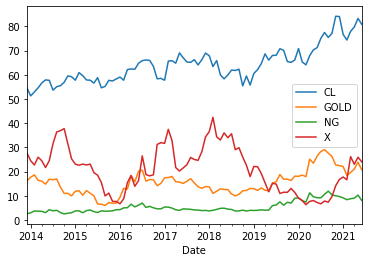

In [9]:
resources_two_df = resources_df.pivot_table(index=['Date'], columns='Ticker', values=['Price'])
resources_two_df.columns = [col[1] for col in resources_two_df.columns.values]
resources_two_df.plot()
resources_two_df['CL']

In [10]:
CL_only = resources_two_df.loc[:, resources_two_df.columns.intersection(['Date','CL'])]
NG_only = resources_two_df.loc[:, resources_two_df.columns.intersection(['Date','NG'])]
X_only = resources_two_df.loc[:, resources_two_df.columns.intersection(['Date','X'])]
GOLD_only = resources_two_df.loc[:, resources_two_df.columns.intersection(['Date','GOLD'])]

In [11]:
carsales = pd.read_csv('output_data/US_car_sales_20142021.csv')
carsales

,Date,Car sales
0,12/1/2013,1350623
1,1/1/2014,1006049
2,2/1/2014,1186038
3,3/1/2014,1529348
4,4/1/2014,1381300
...,...,...
86,2/1/2021,1256529
87,3/1/2021,1536038
88,4/1/2021,1493938
89,5/1/2021,1502642


# Cleaning Up the Data To Fit Percentages For Stock

In [12]:
#have to use the seperate dataframe in order to avoid continuing making the first row NA and dropping it

In [13]:
TSLA_only['percent_change'] = TSLA_only['TSLA'].pct_change(1)
TSLA_only = TSLA_only.dropna()
TSLA_only

,TSLA,percent_change
Date,,
2014-01-01,36.282001,0.205943
2014-02-01,48.962002,0.349485
2014-03-01,41.689999,-0.148523
2014-04-01,41.577999,-0.002686
2014-05-01,41.554001,-0.000577
...,...,...
2021-02-01,675.500000,-0.148740
2021-03-01,667.929993,-0.011207
2021-04-01,709.440002,0.062147


In [14]:
TM_only['percent_change'] = TM_only['TM'].pct_change(1)
TM_only = TM_only.dropna()
TM_only

,TM,percent_change
Date,,
2014-01-01,104.811813,-0.058727
2014-02-01,105.305000,0.004705
2014-03-01,103.113052,-0.020815
2014-04-01,100.839981,-0.022044
2014-05-01,105.202087,0.043258
...,...,...
2021-02-01,147.929993,0.052733
2021-03-01,156.059998,0.054958
2021-04-01,150.770004,-0.033897


In [15]:
F_only['percent_change'] = F_only['F'].pct_change(1)
F_only = F_only.dropna()
F_only

,F,percent_change
Date,,
2014-01-01,10.604847,-0.030460
2014-02-01,10.997108,0.036989
2014-03-01,11.147172,0.013646
2014-04-01,11.540178,0.035256
2014-05-01,11.839206,0.025912
...,...,...
2021-02-01,11.700000,0.111111
2021-03-01,12.250000,0.047009
2021-04-01,11.540000,-0.057959


In [16]:
GM_only['percent_change'] = GM_only['GM'].pct_change(1)
GM_only = GM_only.dropna()
GM_only

,GM,percent_change
Date,,
2014-01-01,27.886005,-0.117201
2014-02-01,27.978752,0.003326
2014-03-01,26.603003,-0.049171
2014-04-01,26.885984,0.010637
2014-05-01,26.963957,0.002900
...,...,...
2021-02-01,51.330002,0.012826
2021-03-01,57.459999,0.119423
2021-04-01,57.220001,-0.004177


In [17]:
HMC_only['percent_change'] = HMC_only['HMC'].pct_change(1)
HMC_only = HMC_only.dropna()
HMC_only

,HMC,percent_change
Date,,
2014-01-01,37.509998,-0.088531
2014-02-01,36.049999,-0.038923
2014-03-01,35.340000,-0.019695
2014-04-01,33.299999,-0.057725
2014-05-01,35.180000,0.056456
...,...,...
2021-02-01,27.670000,0.044940
2021-03-01,30.200001,0.091435
2021-04-01,29.820000,-0.012583


In [18]:
DDAIF_only['percent_change'] = DDAIF_only['DDAIF'].pct_change(1)
DDAIF_only = DDAIF_only.dropna()
DDAIF_only

,DDAIF,percent_change
Date,,
2014-01-01,60.677994,-0.038196
2014-02-01,67.065140,0.105263
2014-03-01,68.785316,0.025649
2014-04-01,67.326439,-0.021209
2014-05-01,71.331055,0.059481
...,...,...
2021-02-01,78.878670,0.138200
2021-03-01,87.905998,0.114446
2021-04-01,87.051399,-0.009722


In [19]:
VWAGY_only['percent_change'] = VWAGY_only['VWAGY'].pct_change(1)
VWAGY_only = VWAGY_only.dropna()
VWAGY_only

,VWAGY,percent_change
Date,,
2014-01-01,23.029680,-0.114625
2014-02-01,24.232758,0.052240
2014-03-01,24.147163,-0.003532
2014-04-01,25.421572,0.052777
2014-05-01,24.974579,-0.017583
...,...,...
2021-02-01,23.005695,0.108282
2021-03-01,35.660892,0.550090
2021-04-01,31.151705,-0.126446


In [20]:
FUJHY_only['percent_change'] = FUJHY_only['FUJHY'].pct_change(1)
FUJHY_only = FUJHY_only.dropna()
FUJHY_only

,FUJHY,percent_change
Date,,
2014-01-01,13.7075,-0.046766
2014-02-01,13.4275,-0.020427
2014-03-01,13.6000,0.012847
2014-04-01,13.1000,-0.036765
2014-05-01,13.3250,0.017176
...,...,...
2021-02-01,9.4400,-0.021762
2021-03-01,10.0000,0.059322
2021-04-01,9.2800,-0.072000


In [21]:
MZDAY_only['percent_change'] = MZDAY_only['MZDAY'].pct_change(1)
MZDAY_only = MZDAY_only.dropna()
MZDAY_only

,MZDAY,percent_change
Date,,
2014-01-01,12.0325,-0.077969
2014-02-01,12.0300,-0.000208
2014-03-01,11.1250,-0.075229
2014-04-01,11.3050,0.016180
2014-05-01,10.9000,-0.035825
...,...,...
2021-02-01,3.9700,0.112045
2021-03-01,4.0900,0.030227
2021-04-01,3.8500,-0.058680


In [22]:
DODGX_only['percent_change'] = DODGX_only['DODGX'].pct_change(1)
DODGX_only = DODGX_only.dropna()
DODGX_only

,DODGX,percent_change
Date,,
2014-01-01,143.872009,-0.030246
2014-02-01,150.355576,0.045065
2014-03-01,151.350998,0.006620
2014-04-01,151.572998,0.001467
2014-05-01,154.667984,0.020419
...,...,...
2021-02-01,208.823471,0.095248
2021-03-01,219.074600,0.049090
2021-04-01,232.161392,0.059737


In [23]:
#merging the data
final_stock_merge = [TSLA_only, TM_only, F_only, GM_only, HMC_only, DDAIF_only, VWAGY_only, FUJHY_only, MZDAY_only, DODGX_only]
finale_stock_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), final_stock_merge)
finale_stock_merged

,TSLA,percent_change_x,TM,percent_change_y,F,percent_change_x,GM,percent_change_y,HMC,percent_change_x,DDAIF,percent_change_y,VWAGY,percent_change_x,FUJHY,percent_change_y,MZDAY,percent_change_x,DODGX,percent_change_y
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01,36.282001,0.205943,104.811813,-0.058727,10.604847,-0.030460,27.886005,-0.117201,37.509998,-0.088531,60.677994,-0.038196,23.029680,-0.114625,13.7075,-0.046766,12.0325,-0.077969,143.872009,-0.030246
2014-02-01,48.962002,0.349485,105.305000,0.004705,10.997108,0.036989,27.978752,0.003326,36.049999,-0.038923,67.065140,0.105263,24.232758,0.052240,13.4275,-0.020427,12.0300,-0.000208,150.355576,0.045065
2014-03-01,41.689999,-0.148523,103.113052,-0.020815,11.147172,0.013646,26.603003,-0.049171,35.340000,-0.019695,68.785316,0.025649,24.147163,-0.003532,13.6000,0.012847,11.1250,-0.075229,151.350998,0.006620
2014-04-01,41.577999,-0.002686,100.839981,-0.022044,11.540178,0.035256,26.885984,0.010637,33.299999,-0.057725,67.326439,-0.021209,25.421572,0.052777,13.1000,-0.036765,11.3050,0.016180,151.572998,0.001467
2014-05-01,41.554001,-0.000577,105.202087,0.043258,11.839206,0.025912,26.963957,0.002900,35.180000,0.056456,71.331055,0.059481,24.974579,-0.017583,13.3250,0.017176,10.9000,-0.035825,154.667984,0.020419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,675.500000,-0.148740,147.929993,0.052733,11.700000,0.111111,51.330002,0.012826,27.670000,0.044940,78.878670,0.138200,23.005695,0.108282,9.4400,-0.021762,3.9700,0.112045,208.823471,0.095248
2021-03-01,667.929993,-0.011207,156.059998,0.054958,12.250000,0.047009,57.459999,0.119423,30.200001,0.091435,87.905998,0.114446,35.660892,0.550090,10.0000,0.059322,4.0900,0.030227,219.074600,0.049090
2021-04-01,709.440002,0.062147,150.770004,-0.033897,11.540000,-0.057959,57.220001,-0.004177,29.820000,-0.012583,87.051399,-0.009722,31.151705,-0.126446,9.2800,-0.072000,3.8500,-0.058680,232.161392,0.059737


In [24]:
#calculating the average percent change of all of the stocks
finale_stock_merged['average_percentage'] = finale_stock_merged[['percent_change_x', 'percent_change_y', 'percent_change_x', 'percent_change_y','percent_change_x', 'percent_change_y', 'percent_change_x', 'percent_change_y', 'percent_change_x', 'percent_change_y']].mean(axis=1)
finale_stock_merged

,TSLA,percent_change_x,TM,percent_change_y,F,percent_change_x,GM,percent_change_y,HMC,percent_change_x,...,percent_change_y,VWAGY,percent_change_x,FUJHY,percent_change_y,MZDAY,percent_change_x,DODGX,percent_change_y,average_percentage
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,36.282001,0.205943,104.811813,-0.058727,10.604847,-0.030460,27.886005,-0.117201,37.509998,-0.088531,...,-0.038196,23.029680,-0.114625,13.7075,-0.046766,12.0325,-0.077969,143.872009,-0.030246,-0.039678
2014-02-01,48.962002,0.349485,105.305000,0.004705,10.997108,0.036989,27.978752,0.003326,36.049999,-0.038923,...,0.105263,24.232758,0.052240,13.4275,-0.020427,12.0300,-0.000208,150.355576,0.045065,0.053752
2014-03-01,41.689999,-0.148523,103.113052,-0.020815,11.147172,0.013646,26.603003,-0.049171,35.340000,-0.019695,...,0.025649,24.147163,-0.003532,13.6000,0.012847,11.1250,-0.075229,151.350998,0.006620,-0.025820
2014-04-01,41.577999,-0.002686,100.839981,-0.022044,11.540178,0.035256,26.885984,0.010637,33.299999,-0.057725,...,-0.021209,25.421572,0.052777,13.1000,-0.036765,11.3050,0.016180,151.572998,0.001467,-0.002411
2014-05-01,41.554001,-0.000577,105.202087,0.043258,11.839206,0.025912,26.963957,0.002900,35.180000,0.056456,...,0.059481,24.974579,-0.017583,13.3250,0.017176,10.9000,-0.035825,154.667984,0.020419,0.017162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,675.500000,-0.148740,147.929993,0.052733,11.700000,0.111111,51.330002,0.012826,27.670000,0.044940,...,0.138200,23.005695,0.108282,9.4400,-0.021762,3.9700,0.112045,208.823471,0.095248,0.050488
2021-03-01,667.929993,-0.011207,156.059998,0.054958,12.250000,0.047009,57.459999,0.119423,30.200001,0.091435,...,0.114446,35.660892,0.550090,10.0000,0.059322,4.0900,0.030227,219.074600,0.049090,0.110479
2021-04-01,709.440002,0.062147,150.770004,-0.033897,11.540000,-0.057959,57.220001,-0.004177,29.820000,-0.012583,...,-0.009722,31.151705,-0.126446,9.2800,-0.072000,3.8500,-0.058680,232.161392,0.059737,-0.025358


<AxesSubplot:xlabel='Date'>

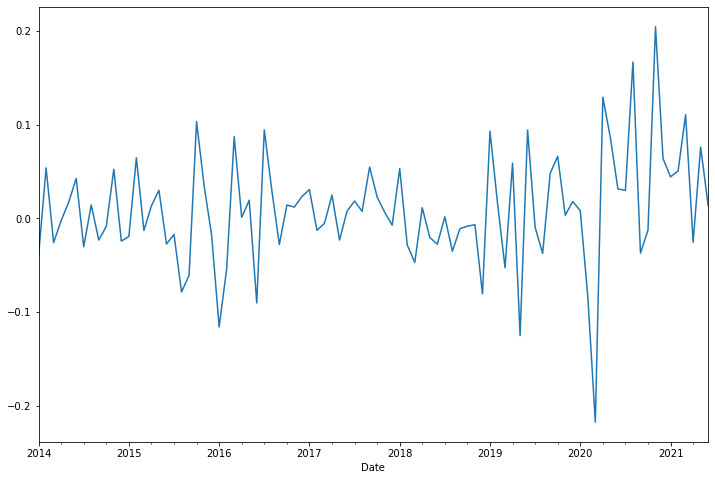

In [25]:
finale_stock_merged['average_percentage'].plot(figsize=(12, 8))

# Cleaning Up the Data To Fit Percentages For Commodities

In [26]:
CL_only['percent_change'] = CL_only['CL'].pct_change(1)
CL_only = CL_only.dropna()
CL_only

,CL,percent_change
Date,,
2014-01-01,51.287907,-0.061034
2014-02-01,52.905964,0.031549
2014-03-01,54.623745,0.032469
2014-04-01,56.669933,0.037460
2014-05-01,57.906483,0.021820
...,...,...
2021-02-01,74.378204,-0.030517
2021-03-01,77.968536,0.048271
2021-04-01,79.818100,0.023722


In [27]:
NG_only['percent_change'] = NG_only['NG'].pct_change(1)
NG_only = NG_only.dropna()
NG_only

,NG,percent_change
Date,,
2014-01-01,2.91,0.145669
2014-02-01,3.69,0.268041
2014-03-01,3.61,-0.021680
2014-04-01,3.53,-0.022161
2014-05-01,3.01,-0.147309
...,...,...
2021-02-01,8.35,-0.084430
2021-03-01,8.76,0.049102
2021-04-01,8.99,0.026256


In [28]:
X_only['percent_change'] = X_only['X'].pct_change(1)
X_only = X_only.dropna()
X_only

,X,percent_change
Date,,
2014-01-01,24.477121,-0.114915
2014-02-01,22.705315,-0.072386
2014-03-01,25.933987,0.142199
2014-04-01,24.440506,-0.057588
2014-05-01,21.641397,-0.114527
...,...,...
2021-02-01,16.593538,-0.064752
2021-03-01,26.159918,0.576512
2021-04-01,23.001137,-0.120749


In [29]:
GOLD_only['percent_change'] = GOLD_only['GOLD'].pct_change(1)
GOLD_only = GOLD_only.dropna()
GOLD_only

,GOLD,percent_change
Date,,
2014-01-01,17.639677,0.093590
2014-02-01,18.646093,0.057054
2014-03-01,16.351828,-0.123043
2014-04-01,16.021667,-0.020191
2014-05-01,14.774424,-0.077847
...,...,...
2021-02-01,18.409718,-0.165400
2021-03-01,19.614727,0.065455
2021-04-01,21.051159,0.073232


# Displaying the Graphs Needed for the Presentation

The correlation between the total average percent of all stocks and oil is 0.33
The correlation between the total average percent of all stocks and natural gas is 0.15
The correlation between the total average percent of all stocks and steel is 0.45
The correlation between the total average percent of all stocks and gold is -0.02


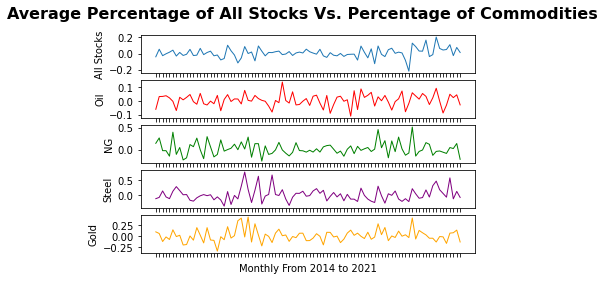

In [30]:
#Graphing the average percent change of all stocks vs the percent change of the individual commodities
month = DATES_only['Date']
average_percent = finale_stock_merged.iloc[:,20]
average_percent_c = CL_only.iloc[:,1]
average_percent_ng = NG_only.iloc[:,1]
average_percent_x = X_only.iloc[:,1]
average_percent_gold = GOLD_only.iloc[:,1]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
fig.suptitle("Average Percentage of All Stocks Vs. Percentage of Commodities", fontsize=16, fontweight="bold")

#ax1.set_xticklabels([])
ax1.plot(month, average_percent, linewidth=1)
ax1.set_ylabel("All Stocks")

ax2.set_xticklabels([])
ax2.plot(month, average_percent_c, linewidth=1, color="r")
ax2.set_ylabel("Oil")

ax3.set_xticklabels([])
ax3.plot(month, average_percent_ng, linewidth=1, color="g")
ax3.set_ylabel("NG")

ax4.set_xticklabels([])
ax4.plot(month, average_percent_x, linewidth=1, color="purple")
ax4.set_ylabel("Steel")

ax5.set_xticklabels([])
ax5.plot(month, average_percent_gold, linewidth=1, color="orange")
ax5.set_ylabel("Gold")
ax5.set_xlabel("Monthly From 2014 to 2021")

correlation_one = st.pearsonr(average_percent,average_percent_c)
correlation_two = st.pearsonr(average_percent,average_percent_ng)
correlation_three = st.pearsonr(average_percent,average_percent_x)
correlation_four = st.pearsonr(average_percent,average_percent_gold)
print(f"The correlation between the total average percent of all stocks and oil is {round(correlation_one[0],2)}")
print(f"The correlation between the total average percent of all stocks and natural gas is {round(correlation_two[0],2)}")
print(f"The correlation between the total average percent of all stocks and steel is {round(correlation_three[0],2)}")
print(f"The correlation between the total average percent of all stocks and gold is {round(correlation_four[0],2)}")

plt.savefig("output_data/commodity_visuals/average percentage of all stocks vs. percentage of commodities.PNG")

plt.show()

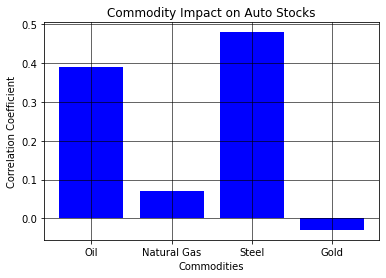

In [31]:
#graphing the correlation coefficient for a better visual
y_values = [0.39, 0.07, 0.48, -0.03] 
x_axis = ['Oil', 'Natural Gas', 'Steel', 'Gold']
plt.bar(x_axis, y_values, color='blue')
plt.xticks(x_axis)  
plt.title('Commodity Impact on Auto Stocks')
plt.xlabel('Commodities')
plt.ylabel('Correlation Coefficient')
plt.grid(linestyle='-', color='black', alpha=0.75)

plt.savefig("output_data/commodity_visuals/average percentage of all stocks vs. percentage of commodities coefficient.PNG")


In [32]:
#making sure the amount of rows matches up with the rest of the data
carsales = carsales.drop(0)
carsales

,Date,Car sales
1,1/1/2014,1006049
2,2/1/2014,1186038
3,3/1/2014,1529348
4,4/1/2014,1381300
5,5/1/2014,1598730
...,...,...
86,2/1/2021,1256529
87,3/1/2021,1536038
88,4/1/2021,1493938
89,5/1/2021,1502642


The correlation between Car Sales and the price of oil is -0.05
The correlation between Car Sales and the price of natural gas is -0.26
The correlation between Car Sales and the price of steel is 0.2
The correlation between Car Sales and the price of gold is -0.26


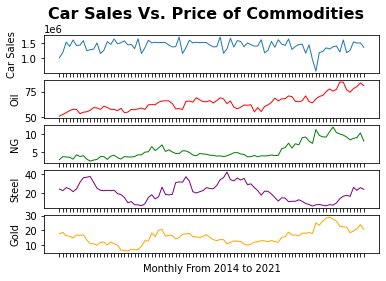

In [33]:
#Graphing the car sales vs the price of the individual commodities
month = DATES_only['Date']
carsalesss = carsales.iloc[:,1]
cl_price = CL_only.iloc[:,0]
ng_price = NG_only.iloc[:,0]
X_price = X_only.iloc[:,0]
GOLD_price = GOLD_only.iloc[:,0]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
fig.suptitle("Car Sales Vs. Price of Commodities", fontsize=16, fontweight="bold")

ax1.set_xticklabels([])
ax1.plot(month, carsalesss, linewidth=1)
ax1.set_ylabel("Car Sales")

ax2.set_xticklabels([])
ax2.plot(month, cl_price, linewidth=1, color="r")
ax2.set_ylabel("Oil")

ax3.set_xticklabels([])
ax3.plot(month, ng_price, linewidth=1, color="g")
ax3.set_ylabel("NG")

ax4.set_xticklabels([])
ax4.plot(month, X_price, linewidth=1, color="purple")
ax4.set_ylabel("Steel")

ax5.set_xticklabels([])
ax5.plot(month, GOLD_price, linewidth=1, color="orange")
ax5.set_ylabel("Gold")
ax5.set_xlabel("Monthly From 2014 to 2021")

correlation_one = st.pearsonr(carsalesss,cl_price)
correlation_two = st.pearsonr(carsalesss,ng_price)
correlation_three = st.pearsonr(carsalesss,X_price)
correlation_four = st.pearsonr(carsalesss,GOLD_price)
print(f"The correlation between Car Sales and the price of oil is {round(correlation_one[0],2)}")
print(f"The correlation between Car Sales and the price of natural gas is {round(correlation_two[0],2)}")
print(f"The correlation between Car Sales and the price of steel is {round(correlation_three[0],2)}")
print(f"The correlation between Car Sales and the price of gold is {round(correlation_four[0],2)}")

plt.savefig("output_data/commodity_visuals/car sales vs. price of commidities.png")

plt.show()

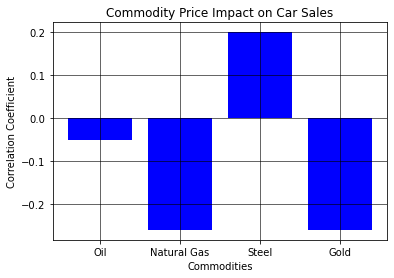

In [34]:
#graphing the correlation coefficient for a better visual
y_values = [-.05, -.26, .2, -0.26] 
x_axis = ['Oil', 'Natural Gas', 'Steel', 'Gold']
plt.bar(x_axis, y_values, color='blue')
plt.xticks(x_axis)  
plt.title('Commodity Price Impact on Car Sales')
plt.xlabel('Commodities')
plt.ylabel('Correlation Coefficient')
plt.grid(linestyle='-', color='black', alpha=0.75)

plt.savefig("output_data/commodity_visuals/car sales vs. price of commidities coefficient.PNG")


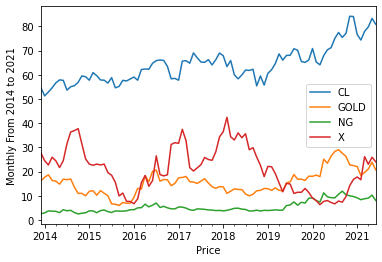

In [35]:
#graphing the price of commodities all together
resources_two_df.plot()
plt.xlabel('Price')
plt.ylabel('Monthly From 2014 to 2021')
fig.suptitle("Commodities", fontsize=16, fontweight="bold")
plt.savefig("output_data/Commodity_visuals/commodities.png")
